## Welcome to CS677 Project 

### Dataset : https://archive.ics.uci.edu/ml/datasets/bank+marketing 

<b> The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). </b>

Input variables:
### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                   "blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

### related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)


### other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

#### Dataset collected in marketing campaigns done by the bank. The dataset has both numerical and categorical columns. Goal is to build a model which will help the marketing team to identify potential consumers who will be more likely to invest in new financial products ex: term deposit offered by bank. </span>

#### Project Outcome Tasks:
1.	Doing the extract discovery analysis work.
2.	Features datatypes and distribution of data analysis.
3.	Features selection.
4.	Data Cleanup and preparation.
5.	Use of Pandas profiling module.
6.	Data visualization using matplotlib.pyplot and seaborn packages.
7.	Building the prediction models.
8.	Evaluating the Accuracy, precision, recall for each class across models.
9.	Selecting the best model with highest accuracy, precision and recall.
10.	Saving the model into pickle file and exposing the best model functionality through flask/streamlet Apis.


###  <span style="color:blue">  <b> EXPLORATORY DATA ANALYSIS WORK </b></span>

In [80]:
import pandas as pd
bank_df = pd.read_csv(r'bank-full.csv',sep=';',header=0)
bank_df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [81]:
# import packages which we required for Exploratory data analysis (EDA)
import pandas as pd  # to store tabular data
import numpy as np  # to do some math
import matplotlib.pyplot as plt  # a popular data visualization tool
import seaborn as sns  # another popular data visualization tool
%matplotlib inline  
plt.style.use('fivethirtyeight')  # a popular data visualization theme

In [82]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [83]:
bank_df.shape

(45211, 17)

In [84]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [85]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [86]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [87]:
bank_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

<b> Subscribing to the term deposit (outcome)  has been dictated by couple of prominent features, lets see how they impact for outcome </b>
 1. housing loan
 2. personal loan
 3. previous campaign outcome
 4. balance.
 5. education
 6. marital status

In [88]:
len(bank_df.columns)
df_job=bank_df['job'].value_counts().to_frame().reset_index()
joborder=list(df_job.iloc[:,0])
printjobnames=joborder
joborder.sort(reverse=False)
joborder

['admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown']

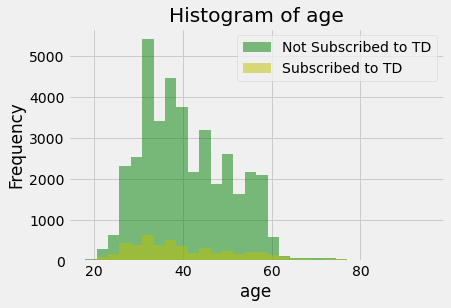

['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']


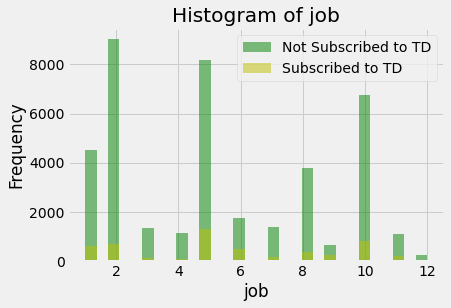

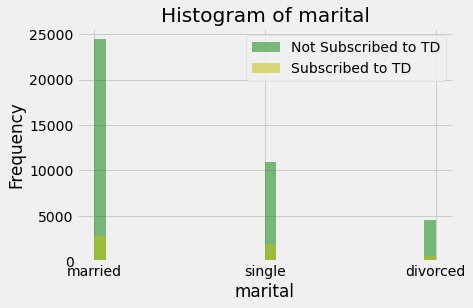

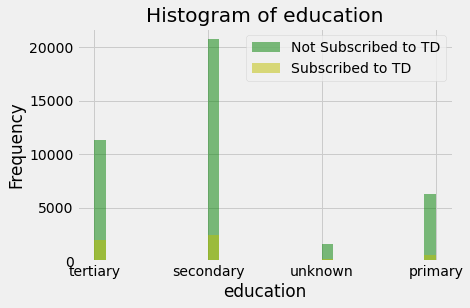

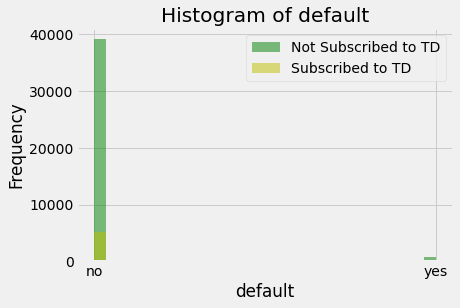

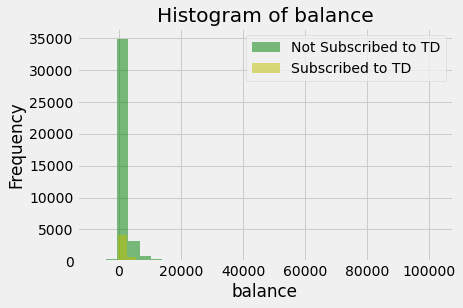

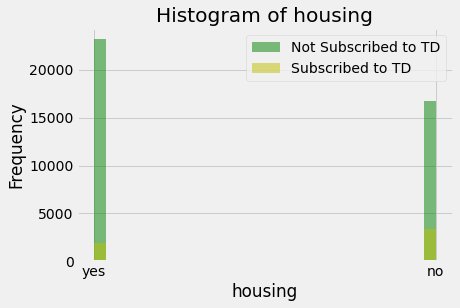

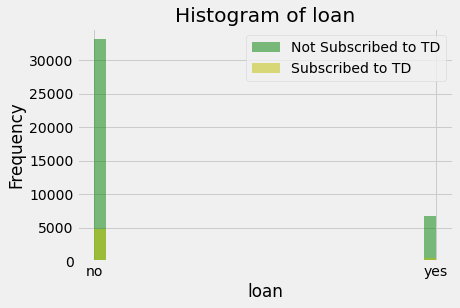

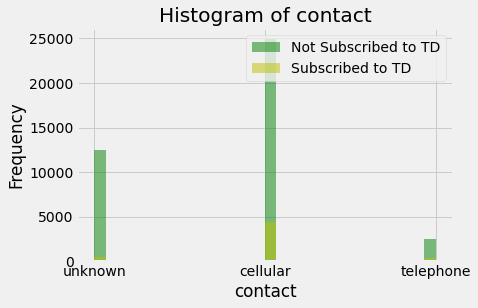

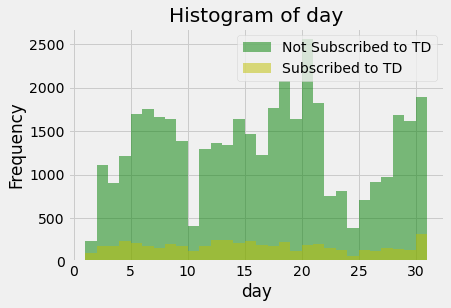

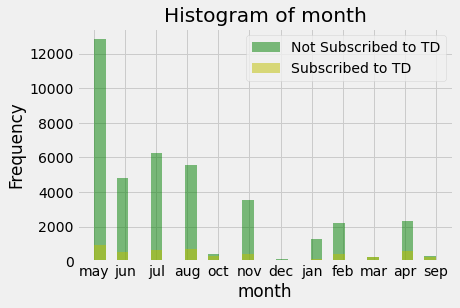

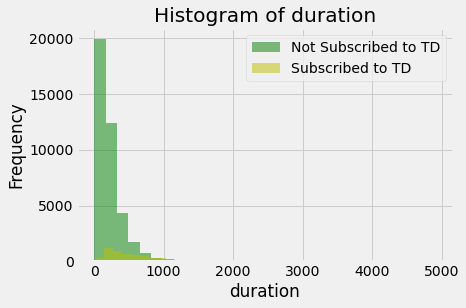

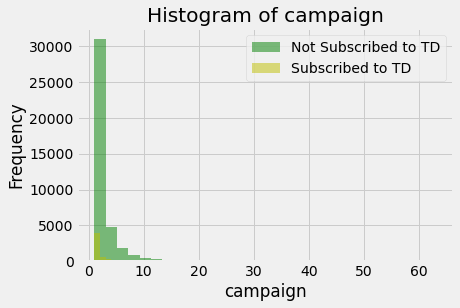

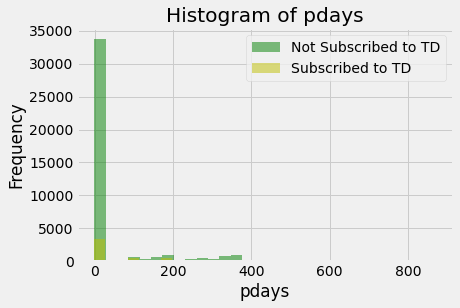

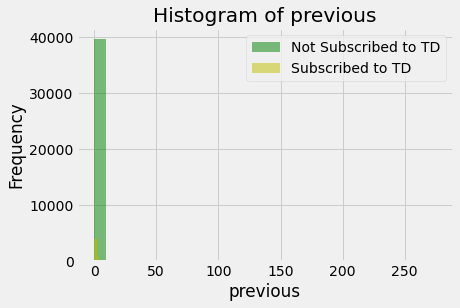

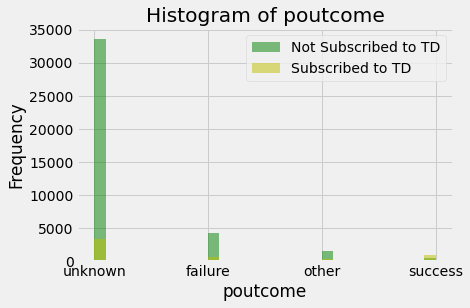

In [89]:
for col in bank_df.columns[0:len(bank_df.columns)-1]:
    
    if col=="job":
        print(printjobnames)
        bank_df[col+'new']=bank_df[col].map(lambda x: joborder.index(x)+1)
        plt.hist(bank_df[bank_df['y']=='no'][col+'new'], 30, color='g',alpha=0.5, label='Not Subscribed to TD')
        plt.hist(bank_df[bank_df['y']=='yes'][col+'new'], 30, color='y',alpha=0.5, label='Subscribed to TD')
        bank_df.drop(columns=['jobnew'],inplace=True)
       
    else:
        plt.hist(bank_df[bank_df['y']=='no'][col], 30, color='g',alpha=0.5, label='Not Subscribed to TD')
        plt.hist(bank_df[bank_df['y']=='yes'][col], 30, color='y',alpha=0.5, label='Subscribed to TD')

    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

Looking at the impact of data values from the features with respect to deposits. Following can be inferred.

1. Young age group are more interested in term deposits. The amount of customers subscribing to term deposit gradually reduces after a certain thershold age of 40 . 

2. Management, Technician, admin , bluecollar jobs have significant term deposits compared to other professionals. 
3. Divorced people are unlikely to subscribe into term deposits.
4. Default people will not be subscribed into term deposits.
5. People with no housing/personal loan are more subscribed into term deposits.
6. Good way in direct marketing campaign to convince the customers is through cellular connection instead of unknown & telephone.
7. December month will have zero customers enrolling into term deposit. 

In [90]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [91]:
sum_df=bank_df.groupby('y').agg({'y':'count'})
sum_df


,y
y,
no,39922
yes,5289


<b> About 8% of users have been subscribed into term deposits</b>

In [92]:
marital_df=bank_df.groupby(['marital','y']).agg({'balance':'sum','y':'count'})
marital_df



balance      y
marital  y                   
divorced no    5076034   4585
         yes   1062354    622
married  no   33527082  24459
         yes   5278057   2755
single   no   13443793  10878
         yes   3202362   1912

Bivariate Analysis: 
1. Duration and y ( response outcome)
2. Education,balance and y .
3. Marital, balance and y . 
4. Job and y

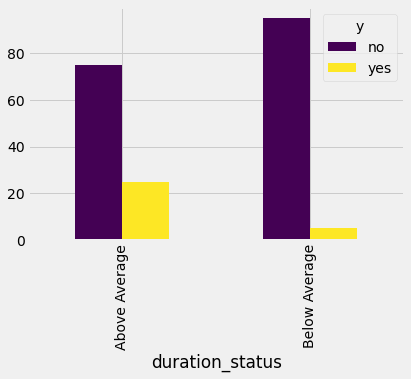

In [93]:
bank_df['duration_status'] = np.select([(bank_df['duration']< bank_df['duration'].mean())], ["Below Average"],default="Above Average")
duration_deposit=pd.crosstab(bank_df['duration_status'], bank_df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

duration_deposit.plot(kind='bar',stacked=False,cmap='viridis')
plt.show()

In [94]:
bank_df.drop(columns=['duration_status'],inplace=True)

In [95]:
for i in bank_df["education"].value_counts().index:
    for j in bank_df["y"].value_counts().index:
        education_balance_amt = bank_df[(bank_df["education"] == i) & (bank_df["y"] == j)]["balance"].sum()
        percentage = round(education_balance_amt*100 / bank_df["balance"].sum(),3)
        print(f"Education level '{i}' and Deposit status '{j}' amount: {education_balance_amt}, percentage: {percentage}")


Education level 'secondary' and Deposit status 'no' amount: 23121065, percentage: 37.54
Education level 'secondary' and Deposit status 'yes' amount: 3674479, percentage: 5.966
Education level 'tertiary' and Deposit status 'no' amount: 19178966, percentage: 31.14
Education level 'tertiary' and Deposit status 'yes' amount: 4209731, percentage: 6.835
Education level 'primary' and Deposit status 'no' amount: 7474166, percentage: 12.135
Education level 'primary' and Deposit status 'yes' amount: 1096092, percentage: 1.78
Education level 'unknown' and Deposit status 'no' amount: 2272712, percentage: 3.69
Education level 'unknown' and Deposit status 'yes' amount: 562471, percentage: 0.913


<mark> Persons with higher secondary , tertiary degrees have high balances </mark>

In [96]:
for i in bank_df["marital"].value_counts().index:
    for j in bank_df["y"].value_counts().index:
        marital_balance_amt = bank_df[(bank_df["marital"] == i) & (bank_df["y"] == j)]["balance"].sum()
        percentage = round(marital_balance_amt*100 / bank_df["balance"].sum(),3)
        print(f"Marital level '{i}' and Deposit status '{j}' amount: {marital_balance_amt}, percentage: {percentage}")

Marital level 'married' and Deposit status 'no' amount: 33527082, percentage: 54.436
Marital level 'married' and Deposit status 'yes' amount: 5278057, percentage: 8.57
Marital level 'single' and Deposit status 'no' amount: 13443793, percentage: 21.828
Marital level 'single' and Deposit status 'yes' amount: 3202362, percentage: 5.2
Marital level 'divorced' and Deposit status 'no' amount: 5076034, percentage: 8.242
Marital level 'divorced' and Deposit status 'yes' amount: 1062354, percentage: 1.725


<b> Insights on Marital feature : 
    Individuals who are single , will have higher rate of subscribing into term deposits.
    Among the balances of all category of individuals who subscribed into term deposits , the divorced category records show a less balance.
  
</b>



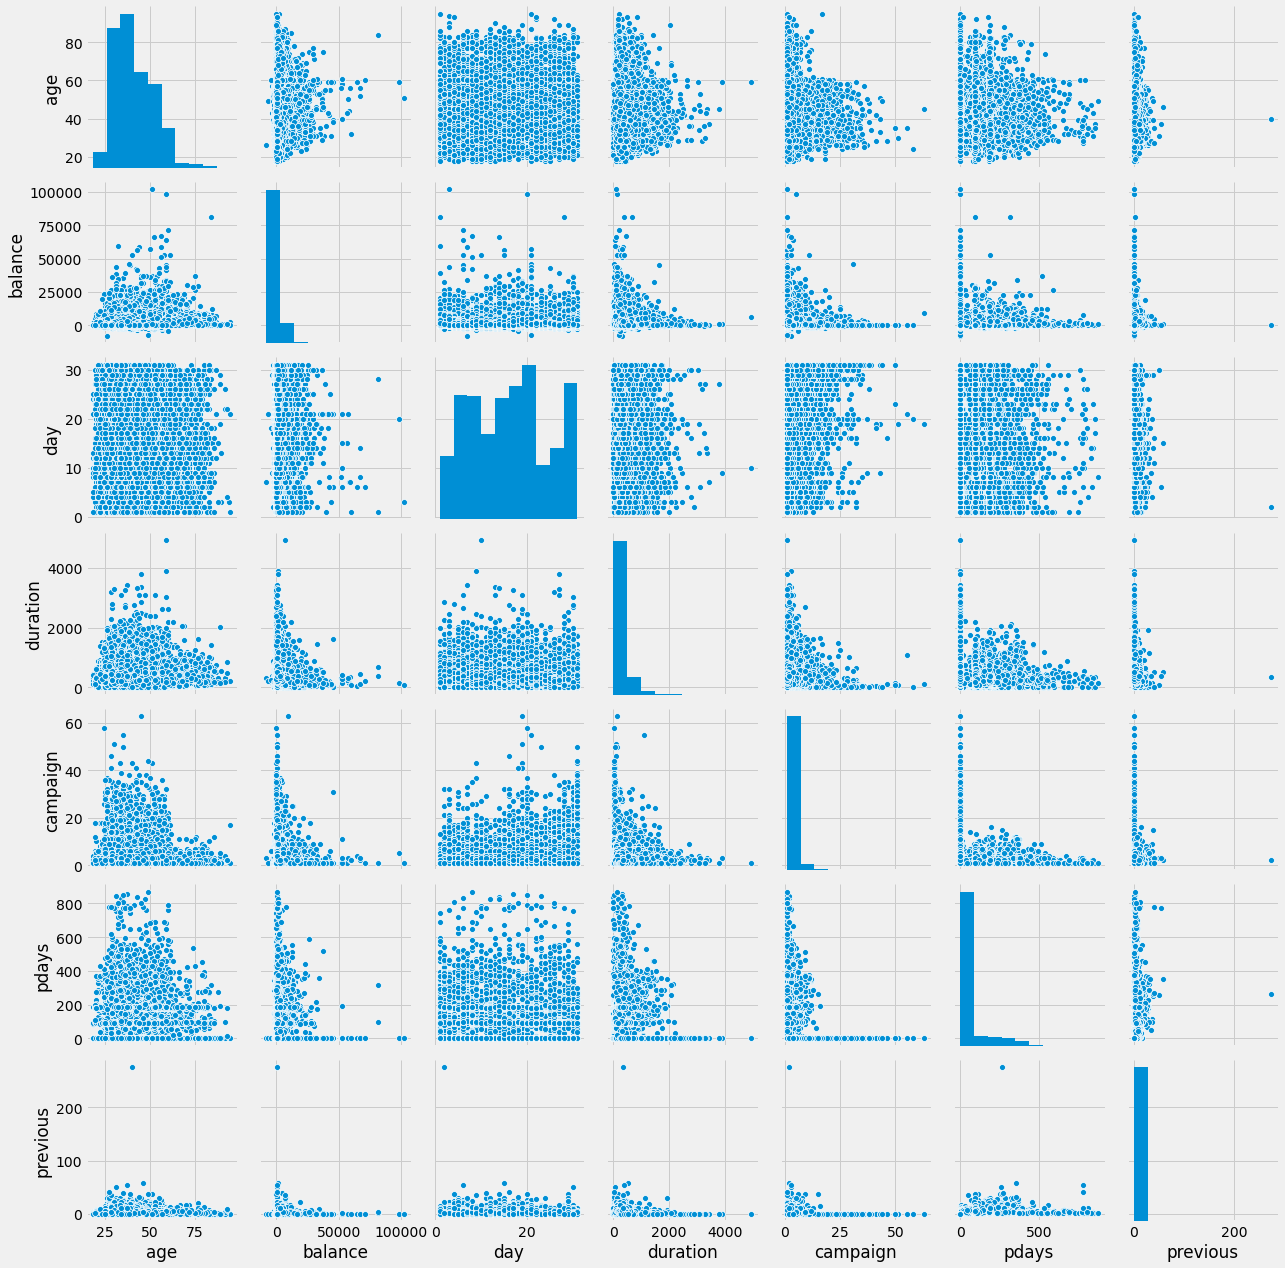

In [97]:
sns.pairplot(bank_df)
plt.show()

## Understanding the categorical variables : job, marital , education, default, housing, loan, contact, poutcome, month.

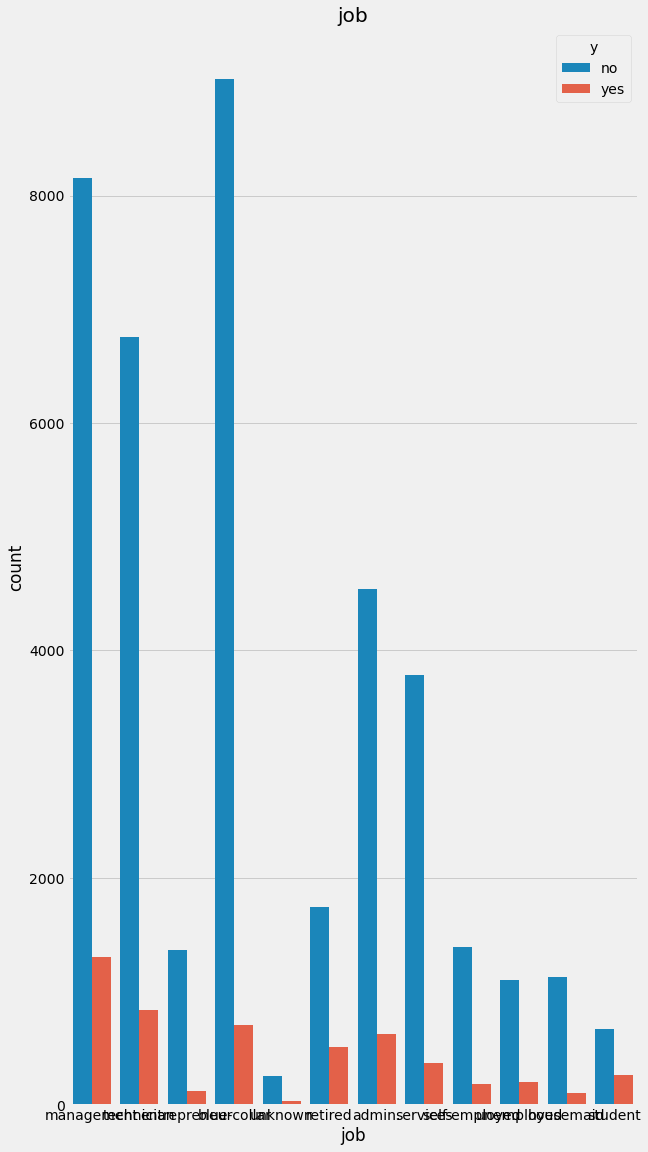

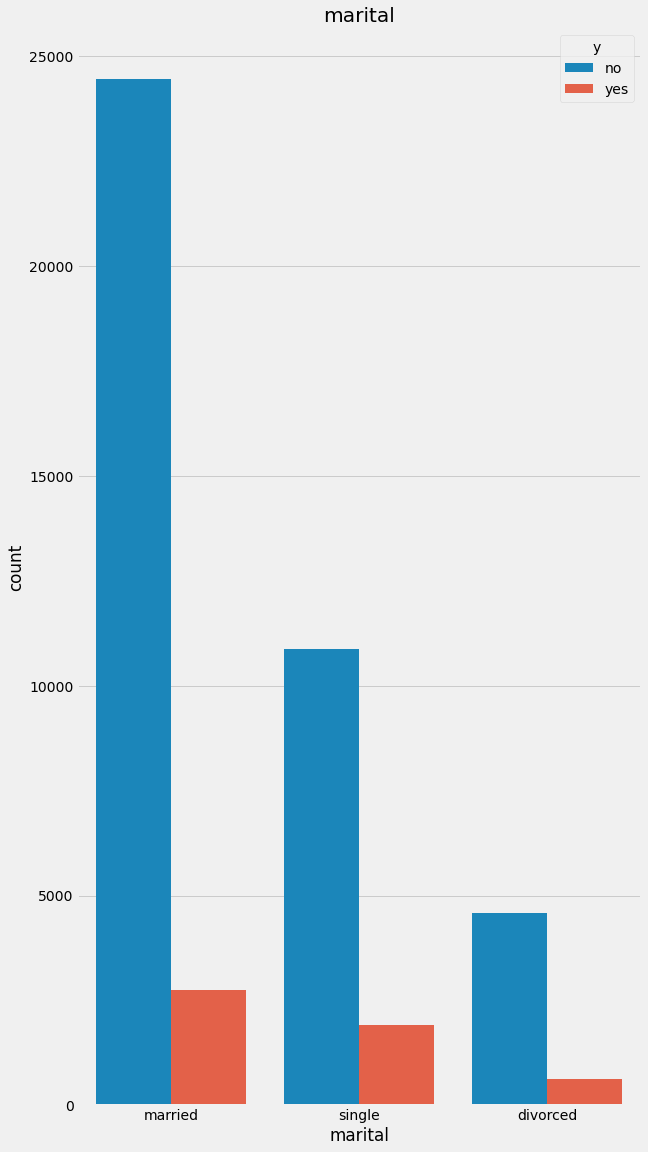

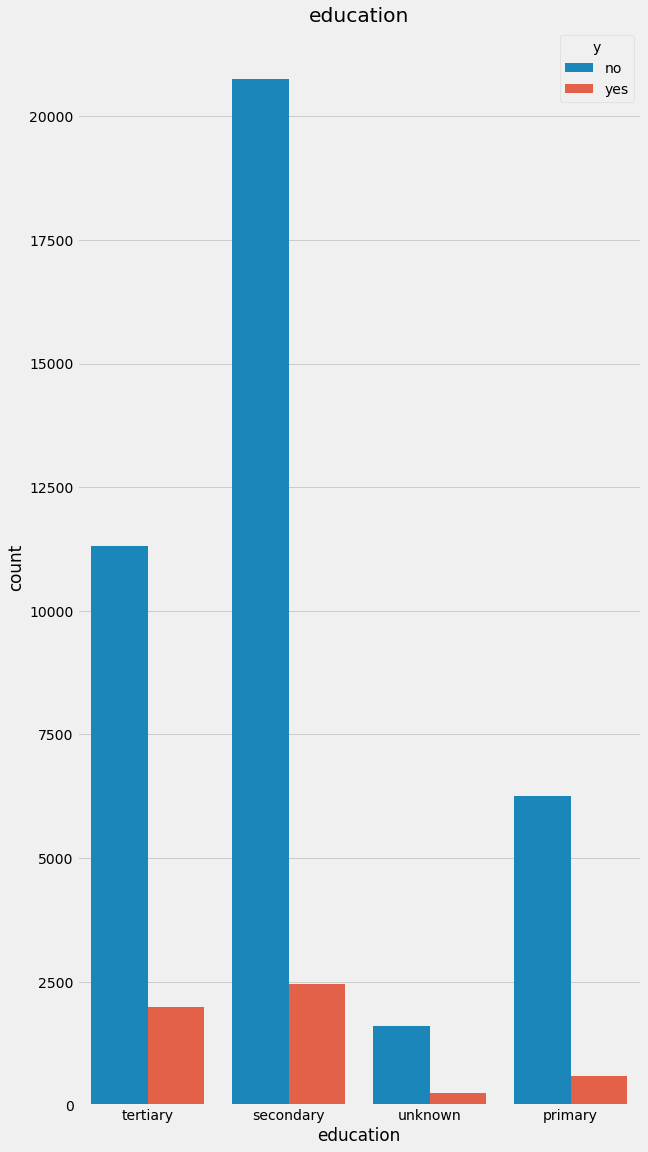

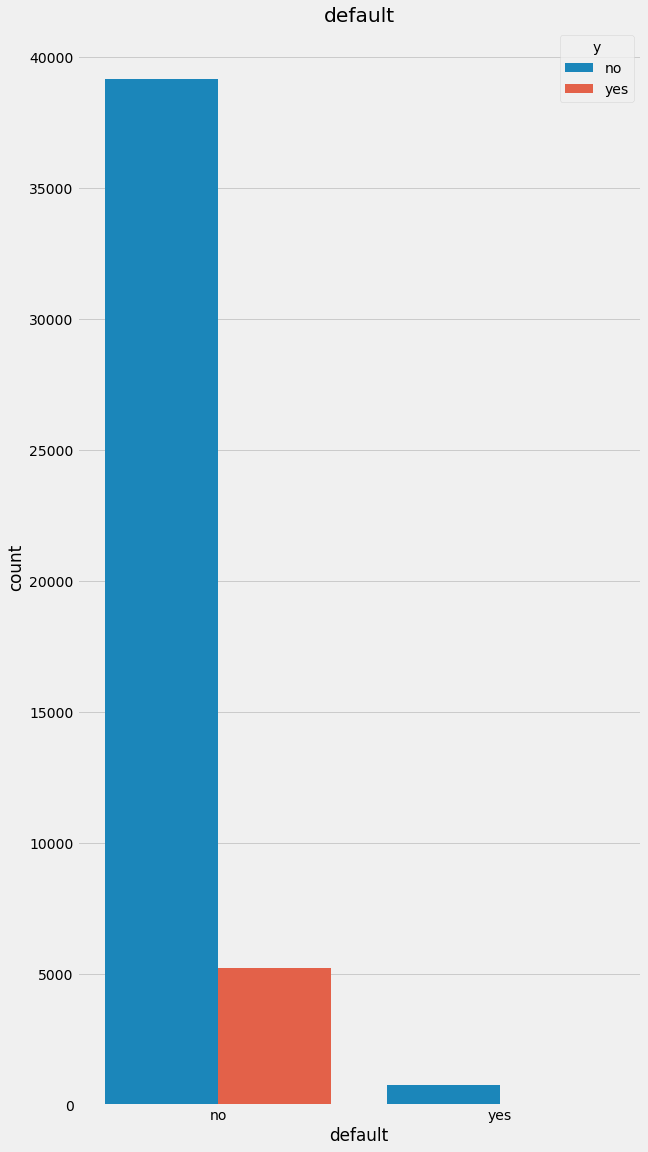

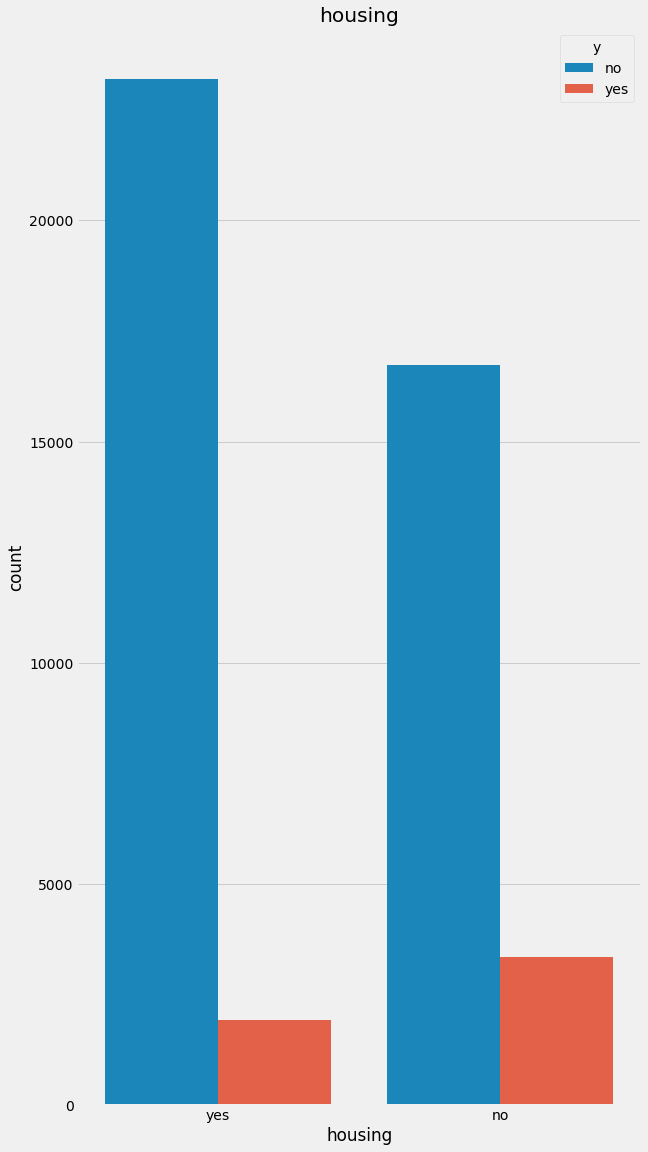

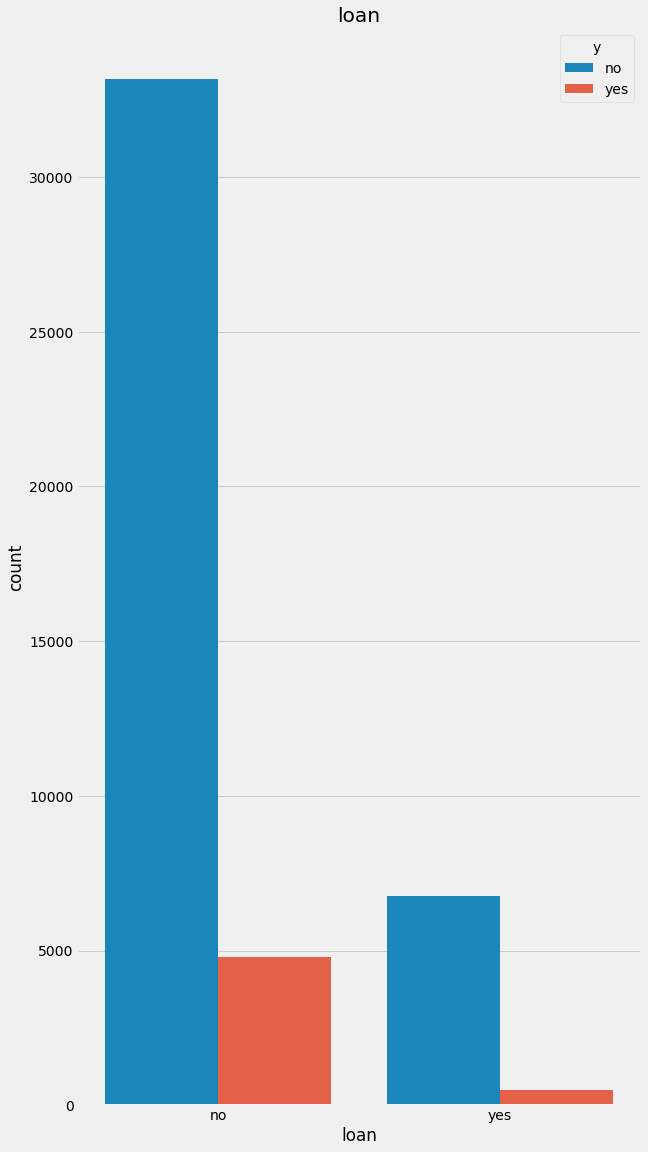

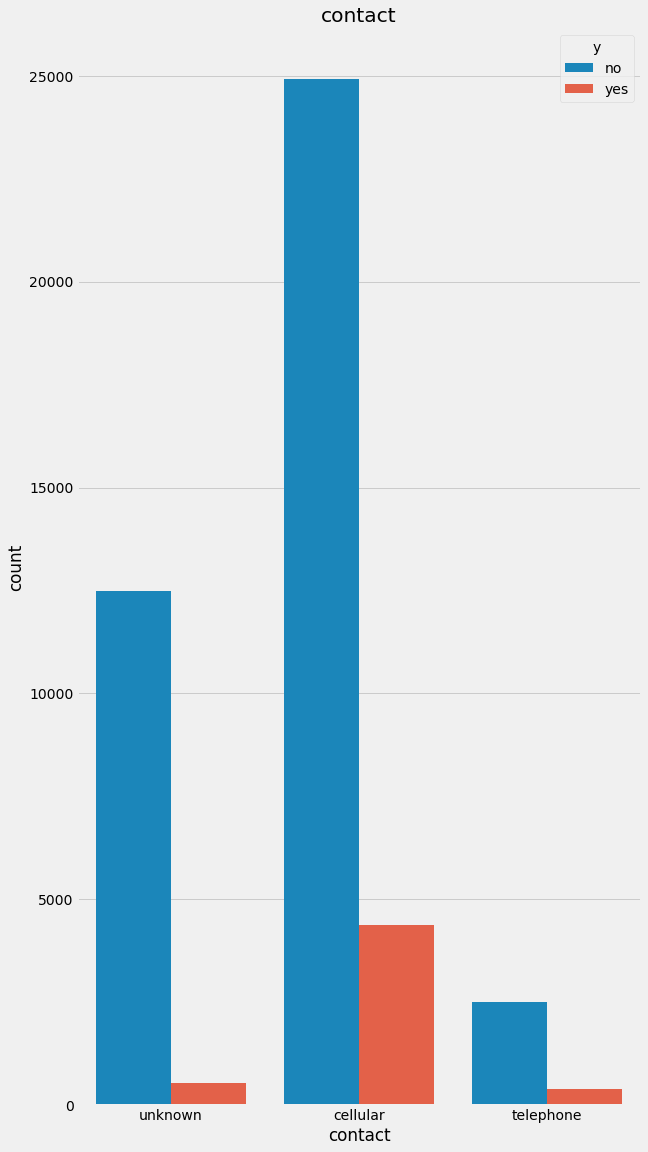

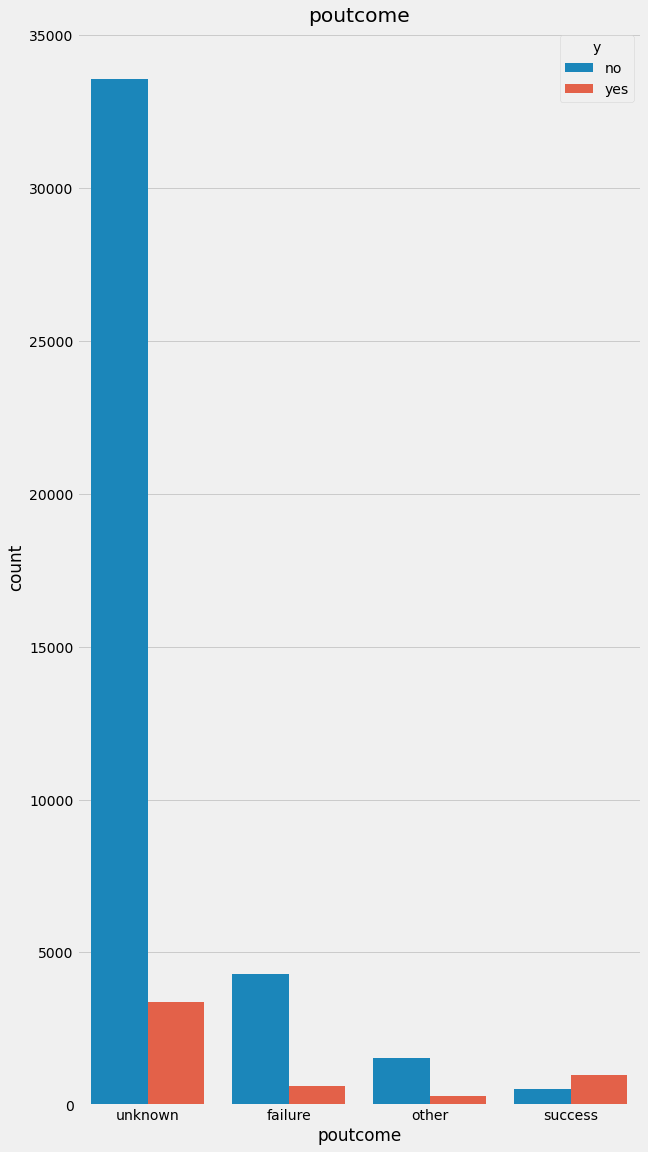

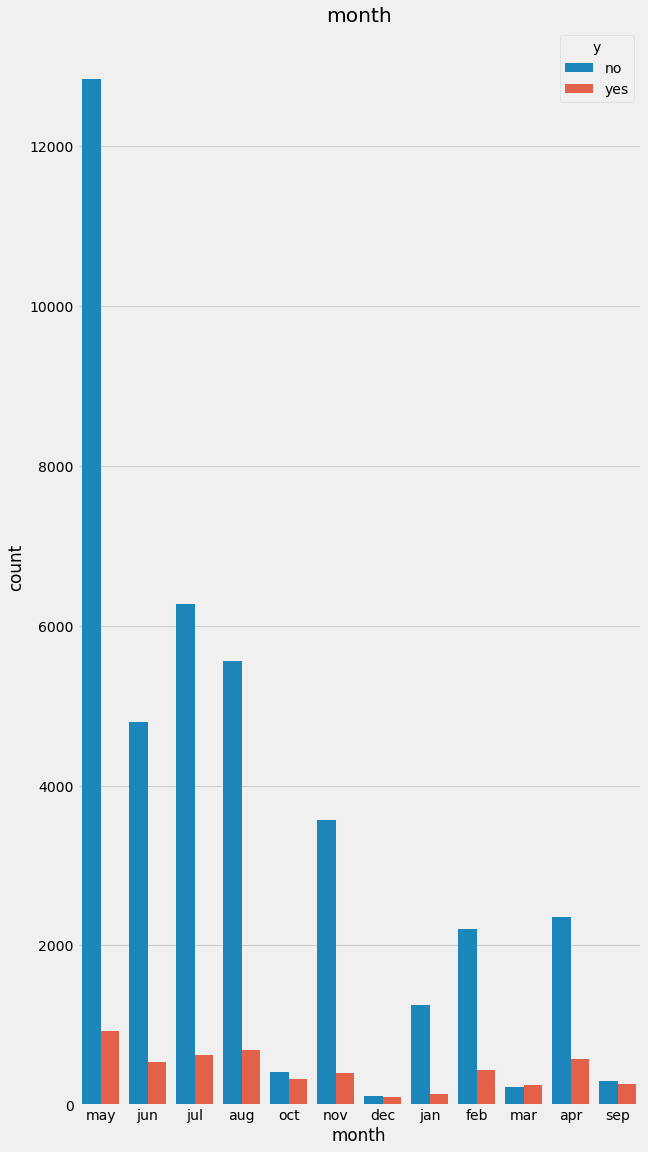

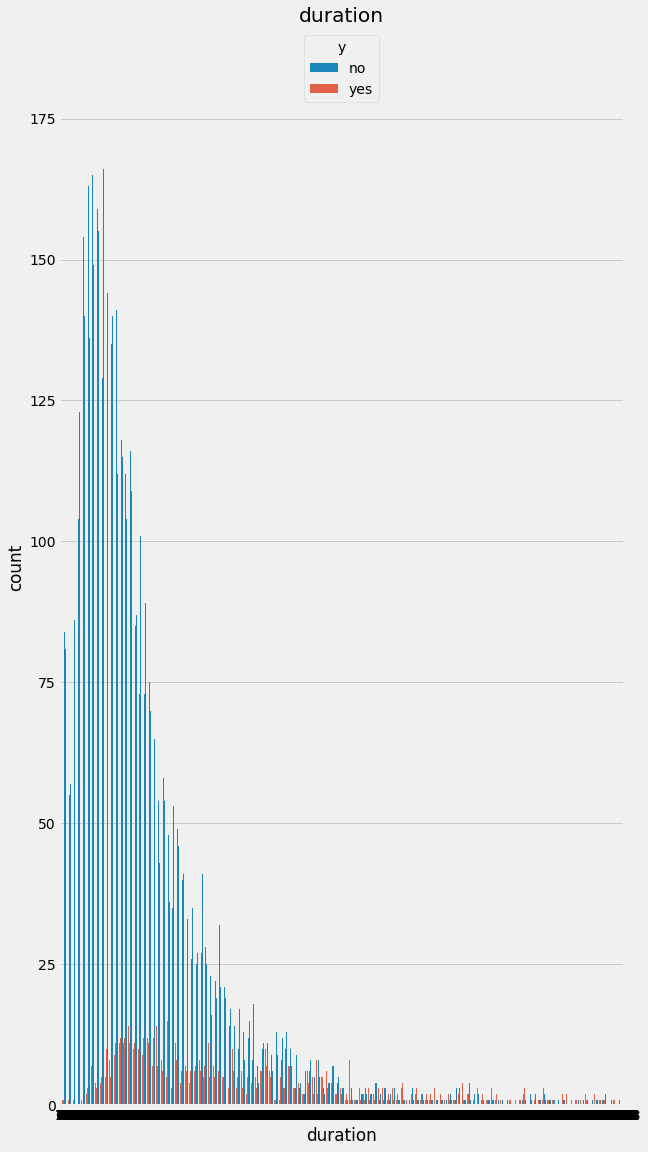

In [98]:
categorical_columns=['job','marital','education','default','housing','loan','contact','poutcome','month','duration']
for col in categorical_columns:
    plt.figure(figsize=(9,16))
    sns.countplot(bank_df[col],hue="y",data=bank_df)
    #sns.barplot(bank_df[col].value_counts(),bank_df[col].value_counts().index,hue="y",data=bank_df)
    plt.title(col)
    plt.tight_layout(pad=0.5)


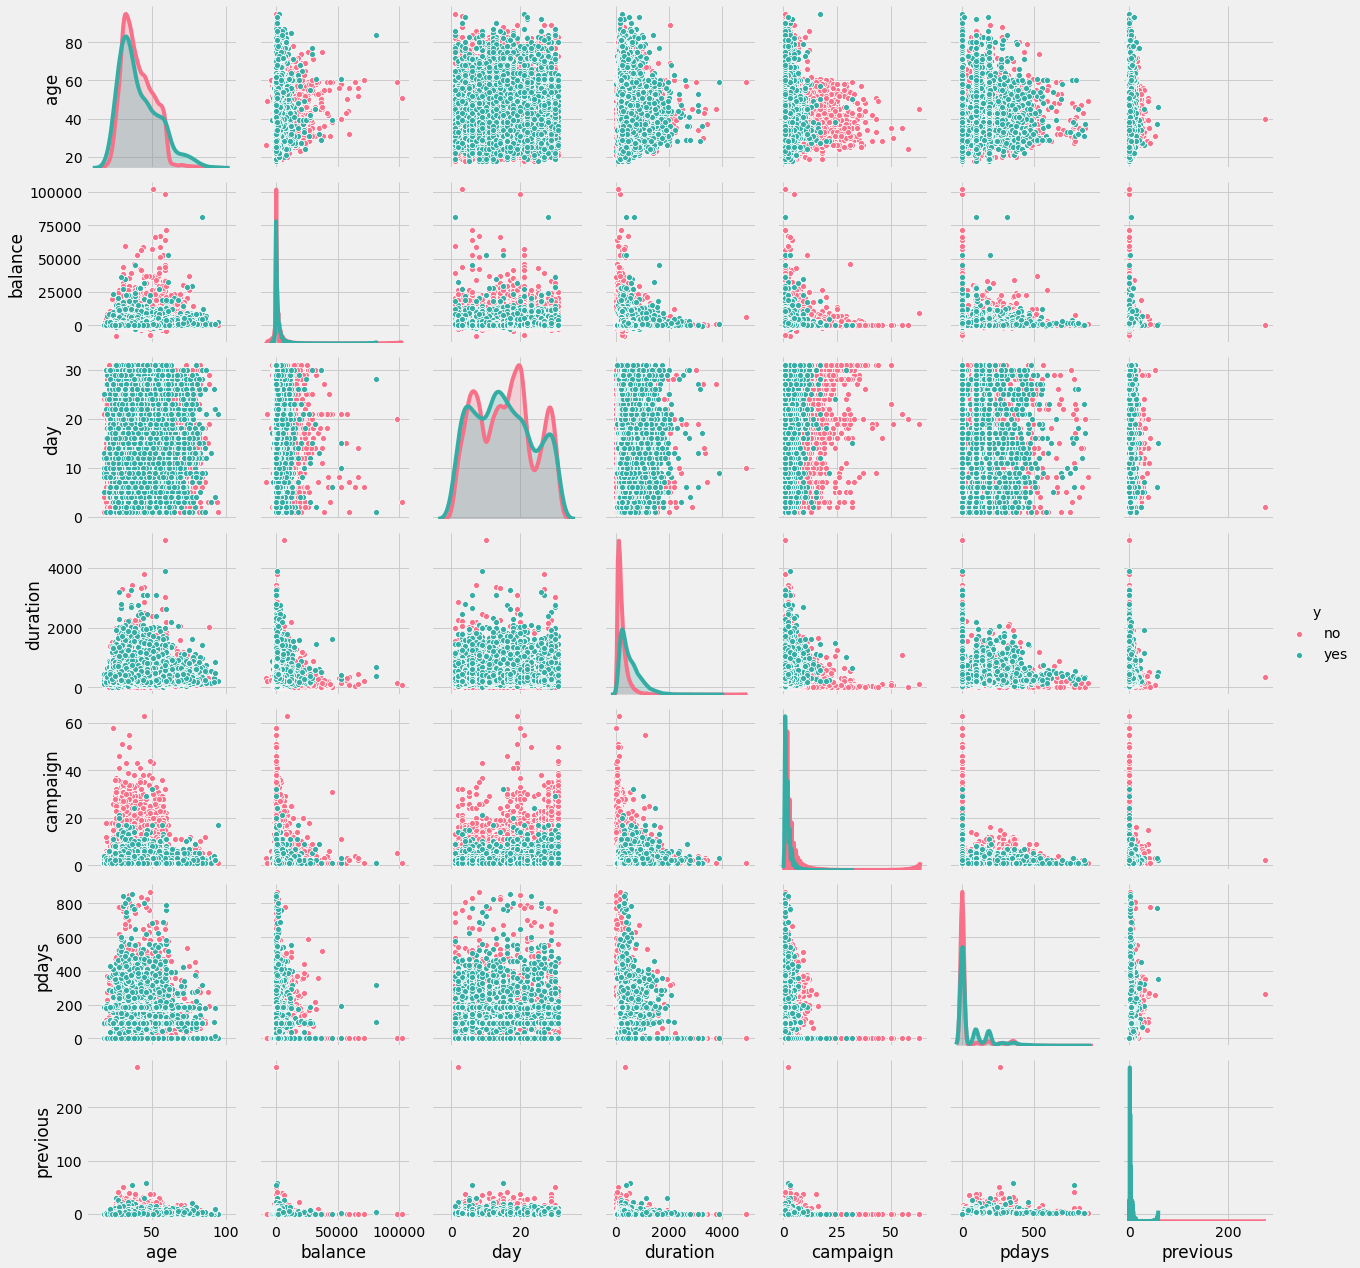

In [99]:
sns.pairplot(bank_df,hue="y",palette="husl")
plt.show()

### Pandas Profiling

1. About 1.8% of people have been defaulted.
2. More than 50% of users are having housing loan.
3. Most of them are having secondary education.
4. About 16% of users do have personal loan.

In [100]:
from pandas_profiling import ProfileReport
#profile = ProfileReport(bank_df)
#profile

### Correlation

In [101]:
model_bank_df=bank_df.copy()
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
model_bank_df['y']=le.fit_transform(model_bank_df['y'])

model_bank_df.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,0


In [102]:
model_bank_df.corr()['y']

<ipython-input-102-7a7be687f786>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  model_bank_df.corr()['y']


age         0.025155
balance     0.052838
day        -0.028348
duration    0.394521
campaign   -0.073172
pdays       0.103621
previous    0.093236
y           1.000000
Name: y, dtype: float64

<ipython-input-103-4de6bd312010>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(model_bank_df.corr())


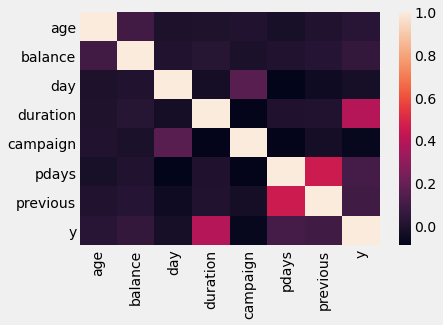

In [103]:
sns.heatmap(model_bank_df.corr())

In [104]:
bank_df.shape

(45211, 17)

In [105]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [106]:
bank_df['y'].value_counts(normalize=True)


no     0.883015
yes    0.116985
Name: y, dtype: float64

###  <span style="color:blue">  <b> FEATURE CONSTRUCTION </b></span>


In [107]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#####  Data cleanup : 

#### poutcome and Contact columns have : unknown values , which is not a good set of rows, so we will be taking out those rows.
from poutcome => unknown, contact => unknown



In [108]:
lst_index=bank_df[(bank_df['poutcome']=='unknown') | (bank_df['contact']=='unknown')].index
#37029 records.

bank_df.drop(lst_index,inplace=True)
bank_df.shape

(8182, 17)

In [109]:
from sklearn.base import TransformerMixin

class CustomEncoder(TransformerMixin):
    def __init__(self, col, ordering=None):
        self.ordering = ordering
        self.col = col
        
    def transform(self, df):
        X = df.copy()
        X[self.col] = X[self.col].map(lambda x: self.ordering.index(x))
        return X
    
    def fit(self, *_):
        return self


In [110]:
from sklearn.base import TransformerMixin

class CustomDummifier(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cols)
    
    def fit(self, *_):
        return self


In [111]:
bank_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes


In [112]:
dict_forencoder=dict()
dict_forencoder['default']=['no', 'yes']
dict_forencoder['housing']=['no', 'yes']
dict_forencoder['loan']=['no', 'yes']
dict_forencoder['y']=['no','yes']
dict_forencoder['contact']=['telephone','cellular']

#cd=CustomDummifier(cols=['poutcome'])
#bank_featured=cd.fit_transform(bank_df)

bank_featured=bank_df
cd=CustomDummifier(cols=['poutcome','month','job','marital','education'])
bank_featured=cd.fit_transform(bank_featured)


for colname in ['default','housing','loan','y','contact']:
    ce=CustomEncoder(col=colname,ordering=dict_forencoder[colname])
    bank_featured=ce.fit_transform(bank_featured)



bank_featured.head(10)

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
24060,33,0,882,0,0,0,21,39,1,151,...,0,0,0,0,1,0,0,0,1,0
24062,42,0,-247,1,1,0,21,519,1,166,...,0,0,0,0,0,1,0,1,0,0
24064,33,0,3444,1,0,0,21,144,1,91,...,0,0,0,0,1,0,0,1,0,0
24072,36,0,2415,1,0,0,22,73,1,86,...,0,0,0,0,1,0,0,0,1,0
24077,36,0,0,1,0,0,23,140,1,143,...,0,0,0,0,1,0,0,0,1,0
24086,44,0,1324,1,0,0,25,119,1,89,...,0,0,0,0,1,0,0,1,0,0
24122,26,0,172,0,1,0,4,21,1,140,...,1,0,0,0,0,1,0,0,1,0
24127,51,0,3132,0,0,0,5,449,1,176,...,0,0,0,0,0,1,0,1,0,0
24151,33,0,1005,1,0,0,10,175,1,174,...,0,1,0,1,0,0,0,1,0,0
24165,30,0,873,1,0,0,12,119,1,167,...,0,0,0,0,1,0,0,1,0,0


In [113]:
bank_featured.shape

(8182, 46)

In [114]:
bank_featured.corr()['y']

age                    0.073138
default               -0.028492
balance                0.077749
housing               -0.321131
loan                  -0.116997
contact                0.008515
day                    0.030231
duration               0.343527
campaign              -0.095125
pdays                 -0.152324
previous               0.010650
y                      1.000000
poutcome_failure      -0.302151
poutcome_other        -0.081689
poutcome_success       0.471098
month_apr             -0.057729
month_aug              0.131323
month_dec              0.074726
month_feb             -0.030340
month_jan             -0.066814
month_jul              0.133988
month_jun              0.117918
month_mar              0.104338
month_may             -0.174217
month_nov             -0.086662
month_oct              0.132114
month_sep              0.150920
job_admin.            -0.003482
job_blue-collar       -0.137730
job_entrepreneur      -0.044011
job_housemaid         -0.002426
job_mana

In [115]:
bank_featured.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      dtype='object')

In [116]:
bank_featured.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
contact                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
month_apr              uint8
month_aug              uint8
month_dec              uint8
month_feb              uint8
month_jan              uint8
month_jul              uint8
month_jun              uint8
month_mar              uint8
month_may              uint8
month_nov              uint8
month_oct              uint8
month_sep              uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services  

In [117]:
bank_featured.head(5)

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
24060,33,0,882,0,0,0,21,39,1,151,...,0,0,0,0,1,0,0,0,1,0
24062,42,0,-247,1,1,0,21,519,1,166,...,0,0,0,0,0,1,0,1,0,0
24064,33,0,3444,1,0,0,21,144,1,91,...,0,0,0,0,1,0,0,1,0,0
24072,36,0,2415,1,0,0,22,73,1,86,...,0,0,0,0,1,0,0,0,1,0
24077,36,0,0,1,0,0,23,140,1,143,...,0,0,0,0,1,0,0,0,1,0


###  <span style="color:blue">  <b> FEATURE SELECTION </b></span>


In [118]:
# Create our feature matrix
#bank_featured.drop(columns=['job','marital','education'],inplace=True)

X = bank_featured.drop('y', axis=1)

# create our response variable
y = bank_featured['y']

In [119]:
X

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
24060,33,0,882,0,0,0,21,39,1,151,...,0,0,0,0,1,0,0,0,1,0
24062,42,0,-247,1,1,0,21,519,1,166,...,0,0,0,0,0,1,0,1,0,0
24064,33,0,3444,1,0,0,21,144,1,91,...,0,0,0,0,1,0,0,1,0,0
24072,36,0,2415,1,0,0,22,73,1,86,...,0,0,0,0,1,0,0,0,1,0
24077,36,0,0,1,0,0,23,140,1,143,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,0,1475,1,0,1,16,1166,3,530,...,0,0,0,0,0,1,0,1,0,0
45201,53,0,583,0,0,1,17,226,1,184,...,0,0,0,0,1,0,0,0,1,0
45204,73,0,2850,0,0,1,17,300,1,40,...,0,0,0,0,1,0,0,1,0,0
45208,72,0,5715,0,0,1,17,1127,5,184,...,0,0,0,0,1,0,0,1,0,0


In [120]:
y

24060    0
24062    1
24064    1
24072    0
24077    1
        ..
45199    0
45201    1
45204    1
45208    1
45210    0
Name: y, Length: 8182, dtype: int64

In [121]:
from sklearn.base import TransformerMixin, BaseEstimator



class CustomCorrelationChooser(TransformerMixin, BaseEstimator):
    def __init__(self, response, cols_to_keep=[], threshold=None):
        # store the response series
        self.response = response
        # store the threshold that we wish to keep
        self.threshold = threshold
        # initialize a variable that will eventually
        # hold the names of the features that we wish to keep
        self.cols_to_keep = cols_to_keep
        
    def transform(self, X):
        # the transform method simply selects the appropiate
        # columns from the original dataset
        return X[self.cols_to_keep]
        
    def fit(self, X, *_):
        # create a new dataframe that holds both features and response
        df = pd.concat([X, self.response], axis=1)
        # store names of columns that meet correlation threshold
        self.cols_to_keep = df.columns[df.corr()[df.columns[-1]].abs() > self.threshold]
        # only keep columns in X, for example, will remove response variable
        self.cols_to_keep = [c for c in self.cols_to_keep if c in X.columns]
        return self




In [122]:
from sklearn.model_selection import GridSearchCV
import numpy as np

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,           # the model to grid search
                        params,          # the parameter set to try 
                        error_score=0., 
                        n_jobs=-1)  # if a parameter set raises an error, continue and set the performance as a big, fat 0
    grid.fit(X, y)           # fit the model and parameters
    # our classical metric for performance
    print("Best Accuracy: {}".format(grid.best_score_))
    # the best parameters that caused the best accuracy
    print("Best Parameters: {}".format(grid.best_params_))
    # the average time it took a model to fit to the data (in seconds)
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))


In [123]:
from copy import deepcopy
# Import four machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Set up some parameters for our grid search
# We will start with four different machine learning models
# logistic regression, KNN, Decision Tree, and Random Forest
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}
knn_params = {'n_neighbors': [1, 3, 5, 7]}
tree_params = {'max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 1, 3, 5, 7]}


# instantiate the four machine learning models
lr = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

ccc = CustomCorrelationChooser(response=y)
ccc_pipe = Pipeline([('correlation_select', ccc), 
                     ('classifier', d_tree)])
tree_pipe_params = {'classifier__max_depth': 
                    [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
# make a copy of the decisino tree pipeline parameters
ccc_pipe_params = deepcopy(tree_pipe_params)

# update that dictionary with feature selector specific parameters
ccc_pipe_params.update({
               'correlation_select__threshold':[0.1, 0.2,.3, 0.4]})

print(ccc_pipe_params)

# better than original (by a little, and a bit faster on 
# average overall
get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y)  

{'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'correlation_select__threshold': [0.1, 0.2, 0.3, 0.4]}
Best Accuracy: 0.8240021776372487
Best Parameters: {'classifier__max_depth': None, 'correlation_select__threshold': 0.4}
Average Time to Fit (s): 0.121
Average Time to Score (s): 0.005


In [124]:
ccc_selected=CustomCorrelationChooser(y,threshold=0.2)
ccc_selected.fit_transform(X)
ccc_selected.cols_to_keep

['housing', 'duration', 'poutcome_failure', 'poutcome_success']

In [125]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
k_best = SelectKBest(f_classif, k=4)
k_best.fit_transform(X, y)
p_values = pd.DataFrame({'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')

p_values.head(10)
p_values[p_values['p_value'] < .05]

,column,p_value
13,poutcome_success,0.000000e+00
7,duration,2.258776e-225
3,housing,1.294724e-195
11,poutcome_failure,2.594885e-172
22,month_may,9.016159e-57
9,pdays,1.150214e-43
25,month_sep,6.900198e-43
27,job_blue-collar,6.097470e-36
19,month_jul,4.333605e-34
24,month_oct,3.503927e-33


In [126]:
p_values[p_values['p_value'] >= .05]

,column,p_value
10,previous,0.335416
5,contact,0.441247
26,job_admin.,0.752806
29,job_housemaid,0.826338
32,job_self-employed,0.860306


In [127]:
k_best = SelectKBest(f_classif)

# Make a new pipeline with SelectKBest
select_k_pipe = Pipeline([('k_best', k_best), 
                          ('classifier', d_tree)])

select_k_best_pipe_params = deepcopy(tree_pipe_params)

select_k_best_pipe_params.update({'k_best__k':list(range(3,15))+['all'],  # the 'all' literally does nothing to subset
                                 })
print(select_k_best_pipe_params)
# comparable to our results with correlationchooser
get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)  

{'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'k_best__k': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'all']}
Best Accuracy: 0.8240021776372487
Best Parameters: {'classifier__max_depth': 1, 'k_best__k': 3}
Average Time to Fit (s): 0.049
Average Time to Score (s): 0.005


In [128]:
k_best = SelectKBest(f_classif,k=3)
k_best.fit_transform(X,y)
p_values = pd.DataFrame({'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')
p_values.head(4)


,column,p_value
13,poutcome_success,0.000000e+00
7,duration,2.258776e-225
3,housing,1.294724e-195
11,poutcome_failure,2.594885e-172


In [129]:
X.iloc[:,[3,7,11,13]]

,housing,duration,poutcome_failure,poutcome_success
24060,0,39,1,0
24062,1,519,0,0
24064,1,144,1,0
24072,1,73,0,0
24077,1,140,1,0
...,...,...,...,...
45199,1,1166,0,0
45201,0,226,0,1
45204,0,300,1,0
45208,0,1127,0,1


In [130]:
# instantiate a class that choses features based
# on feature importances according to the fitting phase
# of a separate decision tree classifier

from copy import deepcopy
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

select_from_pipe = Pipeline([('select', SelectFromModel(DecisionTreeClassifier())), 
                             ('classifier', d_tree)])
tree_pipe_params = {'classifier__max_depth': [1, 3, 5, 7]}
select_from_pipe_params = deepcopy(tree_pipe_params)

select_from_pipe_params.update({
              'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
              'select__estimator__max_depth': [None, 1, 3, 5, 7]
              })

print(select_from_pipe_params)

# not better than original
get_best_model_and_accuracy(select_from_pipe, 
                            select_from_pipe_params, 
                            X, y)  



{'classifier__max_depth': [1, 3, 5, 7], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__max_depth': [None, 1, 3, 5, 7]}
Best Accuracy: 0.8240021776372487
Best Parameters: {'classifier__max_depth': 1, 'select__estimator__max_depth': None, 'select__threshold': 0.01}
Average Time to Fit (s): 0.074
Average Time to Score (s): 0.004


In [131]:
select_from_pipe.set_params(**{'select__threshold': 0.01, 
                               'select__estimator__max_depth': None, 
                               'classifier__max_depth': 1})


# fit our pipeline to our data
select_from_pipe.steps[0][1].fit(X, y)

# list the columns that the SVC selected by calling the get_support() method from SelectFromModel
X.columns[select_from_pipe.steps[0][1].get_support()]

Index(['age', 'balance', 'housing', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome_success', 'job_technician'],
      dtype='object')

<mark> 1. sanity check </mark>

<mark> 2. If we only the worst columns </mark>

In [132]:
# sanity check
# If we only the worst columns
the_worst_of_X = X[X.columns.drop(['housing', 'duration', 'poutcome_failure', 'poutcome_success'])]
the_best_of_X = X.loc[:,['age','balance','housing','day','duration','campaign','pdays','previous','poutcome_success','job_technician']]
the_super_best_of_X = X.loc[:,['housing', 'duration', 'poutcome_failure', 'poutcome_success']]

# much worst than the original 0.8203 without removing anything
# goes to show, that selecting the wrong features will 
# hurt us in predictive performance
get_best_model_and_accuracy(d_tree, tree_params, the_worst_of_X, y)  
get_best_model_and_accuracy(d_tree, tree_params, the_best_of_X, y)
get_best_model_and_accuracy(d_tree, tree_params, the_super_best_of_X, y)  


Best Accuracy: 0.7224281700827293
Best Parameters: {'max_depth': 1}
Average Time to Fit (s): 0.12
Average Time to Score (s): 0.005
Best Accuracy: 0.8240021776372487
Best Parameters: {'max_depth': 1}
Average Time to Fit (s): 0.055
Average Time to Score (s): 0.006
Best Accuracy: 0.8240021776372487
Best Parameters: {'max_depth': 1}
Average Time to Fit (s): 0.015
Average Time to Score (s): 0.003


In [133]:
features=X.columns[select_from_pipe.steps[0][1].get_support()].to_frame().reset_index()['index']
X_bestfeatures=X.loc[:,np.array(features)]
X_bestfeatures

,age,balance,housing,day,duration,campaign,pdays,previous,poutcome_success,job_technician
24060,33,882,0,21,39,1,151,3,0,0
24062,42,-247,1,21,519,1,166,1,0,0
24064,33,3444,1,21,144,1,91,4,0,0
24072,36,2415,1,22,73,1,86,4,0,0
24077,36,0,1,23,140,1,143,3,0,0
...,...,...,...,...,...,...,...,...,...,...
45199,34,1475,1,16,1166,3,530,12,0,0
45201,53,583,0,17,226,1,184,4,1,0
45204,73,2850,0,17,300,1,40,8,0,0
45208,72,5715,0,17,1127,5,184,3,1,0


###  <span style="color:blue">  <b>MODEL BUILDING </b></span>


####  Knn algorithm , finding the best K and then finding the accuracy using that K value.

In [134]:
X = X.loc[:,['housing', 'duration', 'poutcome_failure', 'poutcome_success']]

In [135]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1, stratify=y)


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
accuracy = []

for i in [3,5,7,9,11,13,15]:
  classifier = KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean') # start with k=3, using L^2 norm
  classifier.fit(X_train_sc,y_train)
  y_pred =  classifier.predict(X_test_sc)
  accuracy.append(accuracy_score(y_test,y_pred))

accuracy

[0.7898594990836897,
 0.8087965791081246,
 0.8161270616982285,
 0.8191814294441051,
 0.8185705558949298,
 0.8173488087965791,
 0.822846670739157]

<ipython-input-137-9b8e53aa5cf6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


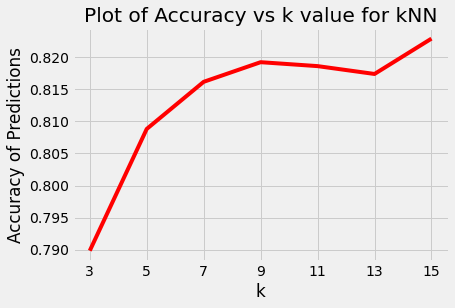

In [137]:
import matplotlib.pyplot as plt
lst_x=range(3,17,2)
plt.plot(lst_x,accuracy,"r-")
ax = plt.axes()
ax.set_xticks([3,5,7,9,11,13,15])
plt.xlabel("k")
plt.ylabel("Accuracy of Predictions")
plt.title("Plot of Accuracy vs k value for kNN")
plt.show()

#### Best value of k is 9 

In [138]:
Model=[]
TP=[]
FP=[]
TN=[]
FN=[]
accuracy_table=[]
TPR_lst=[]
TNR_lst=[]

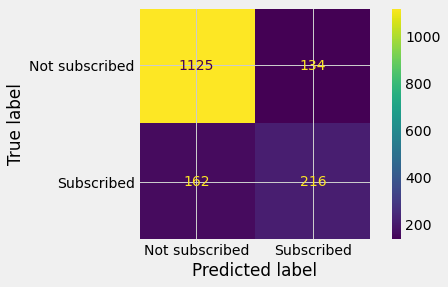

In [139]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
classifier_bestK = KNeighborsClassifier(n_neighbors=9) # start with k=3, using L^2 norm, dont't need last two args since those are defaults

classifier_bestK.fit(X_train_sc,y_train)
y_pred=classifier_bestK.predict(X_test_sc)
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['Not subscribed','Subscribed'])
cm_display.plot()
plt.show()

true_neg=cm[0][0]
true_pos=cm[1][1]
false_pos=cm[0][1]
false_neg=cm[1][0]

TPR = true_pos/(true_pos + false_neg)
TNR = true_neg/(true_neg + false_pos)

Model.append('Knn')
TN.append(true_neg)
TP.append(true_pos)
FP.append(false_pos)
FN.append(false_neg)
TPR_lst.append(TPR)
TNR_lst.append(TNR)
accuracy_table.append(accuracy)

In [140]:
accuracy

0.8191814294441051

In [141]:
X.shape

(8182, 4)

##### Decision Tree algorithm

In [142]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=13)
accuracy_dtree=[]
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
  tree_clf = DecisionTreeClassifier(max_depth=i)
  tree_clf.fit(X_train,y_train)
  y_pred =  tree_clf.predict(X_test)
  accuracy_dtree.append(accuracy_score(y_test,y_pred))

accuracy_dtree


[0.8106291997556506,
 0.8307880268784361,
 0.8307880268784361,
 0.8338423946243128,
 0.8350641417226634,
 0.8326206475259621,
 0.8326206475259621,
 0.8197923029932804,
 0.8204031765424558,
 0.8167379352474038,
 0.8130726939523518,
 0.8167379352474038,
 0.8100183262064753,
 0.8118509468540013,
 0.8045204642638973]

<ipython-input-143-d6320e4f9eab>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


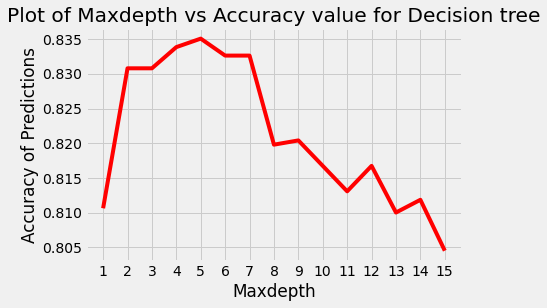

In [143]:
import matplotlib.pyplot as plt
lst_x=range(1,16,1)
plt.plot(lst_x,accuracy_dtree,"r-")
ax = plt.axes()
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.xlabel("Maxdepth")
plt.ylabel("Accuracy of Predictions")
plt.title("Plot of Maxdepth vs Accuracy value for Decision tree")
plt.show()

### Max depth of 4 will have greater accuracy compared to other values.

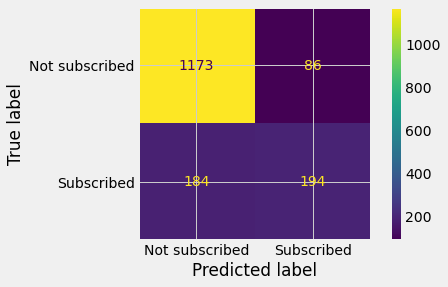

In [144]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train,y_train)
y_pred =  tree_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['Not subscribed','Subscribed'])
cm_display.plot()
plt.show()

true_neg=cm[0][0]
true_pos=cm[1][1]
false_pos=cm[0][1]
false_neg=cm[1][0]

TPR = true_pos/(true_pos + false_neg)
TNR = true_neg/(true_neg + false_pos)

Model.append('DecisionTree')
TN.append(true_neg)
TP.append(true_pos)
FP.append(false_pos)
FN.append(false_neg)
TPR_lst.append(TPR)
TNR_lst.append(TNR)
accuracy_table.append(accuracy)

In [145]:
X_test

,housing,duration,poutcome_failure,poutcome_success
37246,1,177,1,0
36958,1,339,1,0
42495,0,476,1,0
43251,0,241,0,1
34808,1,174,1,0
...,...,...,...,...
30448,1,22,0,0
38976,0,132,1,0
42312,0,175,0,1
40532,1,188,0,0


### RandomForest Classifier

In [146]:
from collections import Counter
def max_frequency_label(ensemble_values):
    """
                  function which returns the maximum value of passed in object.
                   Parameters:
                   ensemble_values (String): String containing the value.

                   Returns:
                   String: Returns a maximum occurance character from the string.

        """
    res = Counter(ensemble_values)
    res = max(res, key=res.get)
    return str(res)

from collections import Counter
def min_frequency_label(ensemble_values):
    """
                  function which returns the maximum value of passed in object.
                   Parameters:
                   ensemble_values (String): String containing the value.

                   Returns:
                   String: Returns a maximum occurance character from the string.

        """
    res = Counter(ensemble_values)
    res = min(res, key=res.get)
    return str(res)



dict_best={}
dict_best_matrix={}
for N in range(1,11):
    drange=[1,2,3,4,5]


    print(' during the number of decision trees in Random forest : {} '.format(N))
    for d in range(1,6):

        rf_clf = RandomForestClassifier(n_estimators=N,criterion='entropy',max_depth=d)
        rf_clf.fit(X_train,y_train)
        y_pred = rf_clf.predict(X_test)
        mat = confusion_matrix(y_test, y_pred)

        acc_calc=metrics.accuracy_score(y_test, y_pred)
        print("Accuracy for tree : {} and depth : {} is {}:".format(N,d,acc_calc))
        
        keyval=str(N)+'_'+str(d)+'_tree'
        dict_best[keyval]=acc_calc
        dict_best_matrix[keyval]=mat

bestkey=max_frequency_label(dict_best)
print(' THE BEST KEY COMBINATION OF N is {} and d is : {} '.format(bestkey.split('_')[0],bestkey.split('_')[1]))
print(' THE BEST ACCURACY FOR BEST COMBINATION OF N and d is : {}'.format(dict_best[bestkey]))
true_neg=dict_best_matrix[bestkey][0][0]
true_pos=dict_best_matrix[bestkey][1][1]
false_pos=dict_best_matrix[bestkey][0][1]
false_neg=dict_best_matrix[bestkey][1][0]

TPR = true_pos/(true_pos + false_neg)
TNR = true_neg/(true_neg + false_pos)
Model.append('RandomForestClassifier')
TN.append(true_neg)
TP.append(true_pos)
FP.append(false_pos)
FN.append(false_neg)
TPR_lst.append(TPR)
TNR_lst.append(TNR)
accuracy_table.append(accuracy)


 during the number of decision trees in Random forest : 1 
Accuracy for tree : 1 and depth : 1 is 0.8106291997556506:
Accuracy for tree : 1 and depth : 2 is 0.7849725106902871:
Accuracy for tree : 1 and depth : 3 is 0.8246792913866829:
Accuracy for tree : 1 and depth : 4 is 0.8283445326817349:
Accuracy for tree : 1 and depth : 5 is 0.8289554062309102:
 during the number of decision trees in Random forest : 2 
Accuracy for tree : 2 and depth : 1 is 0.8222357971899816:
Accuracy for tree : 2 and depth : 2 is 0.8295662797800856:
Accuracy for tree : 2 and depth : 3 is 0.8234575442883323:
Accuracy for tree : 2 and depth : 4 is 0.8216249236408063:
Accuracy for tree : 2 and depth : 5 is 0.8289554062309102:
 during the number of decision trees in Random forest : 3 
Accuracy for tree : 3 and depth : 1 is 0.8222357971899816:
Accuracy for tree : 3 and depth : 2 is 0.8234575442883323:
Accuracy for tree : 3 and depth : 3 is 0.8289554062309102:
Accuracy for tree : 3 and depth : 4 is 0.829566279780085

 BEST CONFUSUION MATRIX IS : [[1175   84]
 [ 186  192]]


Text(80.452, 0.5, 'predicted label')

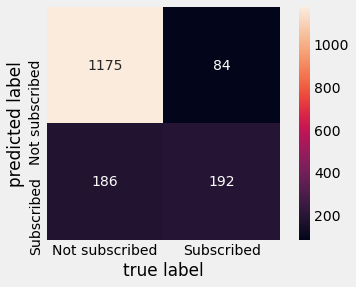

In [147]:
print(' BEST CONFUSUION MATRIX IS : {}'.format(dict_best_matrix[bestkey]))
sns.heatmap(dict_best_matrix[bestkey],square=True, annot=True, fmt = 'd', cbar=True, xticklabels=['Not subscribed','Subscribed'], yticklabels=['Not subscribed','Subscribed'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [148]:
accuracy_table

[0.8191814294441051, 0.8350641417226634, 0.8350641417226634]

#### Gaussian NB. 


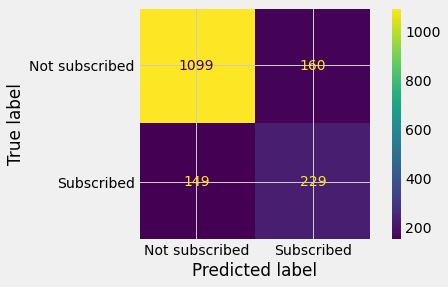

Accuracy for gaussian model is  0.811240073304826


In [149]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

model = GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = mat,display_labels=['Not subscribed','Subscribed'])
cm_display.plot()
plt.show()
accuracy=metrics.accuracy_score(y_test, y_pred)
print('Accuracy for gaussian model is ', accuracy)
Model.append('GaussianNB')
tn, fp, fn, tp = mat.ravel()
TN.append(tn)
TP.append(tp)
FP.append(fp)
FN.append(fn)
TPR_lst.append(tp/(tp + fn))
TNR_lst.append(tn/(tn + fp))
accuracy_table.append(accuracy)

#### Logistic Regression Model

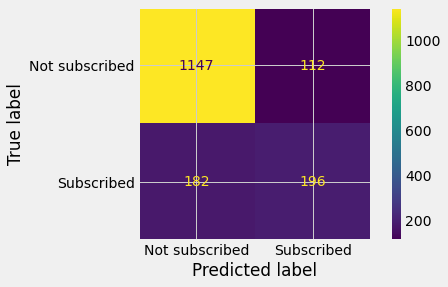

Accuracy for Logistic Regression model is  0.8204031765424558


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = mat,display_labels=['Not subscribed','Subscribed'])
cm_display.plot()
plt.show()
accuracy=metrics.accuracy_score(y_test, y_pred)
print('Accuracy for Logistic Regression model is ', accuracy)
Model.append('LogisticRegression')
tn, fp, fn, tp = mat.ravel()
TN.append(tn)
TP.append(tp)
FP.append(fp)
FN.append(fn)
TPR_lst.append(tp/(tp + fn))
TNR_lst.append(tn/(tn + fp))
accuracy_table.append(accuracy)

#### Linear SVM 


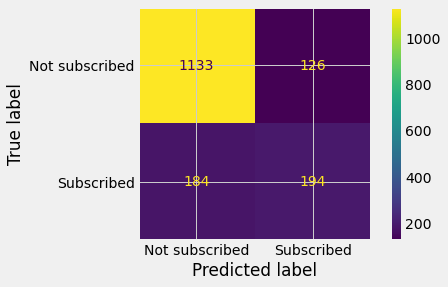

Accuracy for SVM  model is  0.8106291997556506


In [151]:





from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.svm import LinearSVC # support vector classification
c=10
# Fit model to data
linear_svm = LinearSVC(C=c,loss="hinge")
linear_svm.fit(X_train_sc, y_train)
y_pred = linear_svm.predict(X_test_sc)

mat = confusion_matrix(y_test, y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = mat,display_labels=['Not subscribed','Subscribed'])
cm_display.plot()
plt.show()
accuracy=metrics.accuracy_score(y_test, y_pred)
print('Accuracy for SVM  model is ', accuracy)
tn, fp, fn, tp = mat.ravel()
Model.append('LinearSVC')
TN.append(tn)
TP.append(tp)
FP.append(fp)
FN.append(fn)
TPR_lst.append(tp/(tp + fn))
TNR_lst.append(tn/(tn + fp))
accuracy_table.append(accuracy)

In [152]:
accuracy_table

[0.8191814294441051,
 0.8350641417226634,
 0.8350641417226634,
 0.811240073304826,
 0.8204031765424558,
 0.8106291997556506]

### VOTING CLASSIFIER  AND BAGGING CLASSIFIER

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1259
           1       0.65      0.46      0.54       378

    accuracy                           0.82      1637
   macro avg       0.75      0.69      0.71      1637
weighted avg       0.81      0.82      0.81      1637



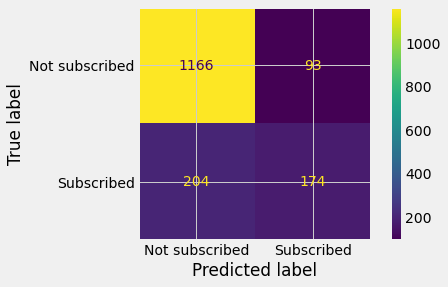

Accuracy obtained is  0.8185705558949298
LogisticRegression 0.8204031765424558
RandomForestClassifier 0.788637751985339
SVC 0.7837507635919365
VotingClassifier 0.8179596823457544


In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

log_clf = LogisticRegression(solver='liblinear')
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
        estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting = 'hard')
voting_clf.fit(X_train, y_train)
y_pred=voting_clf.predict(X_test)


print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = mat,display_labels=['Not subscribed','Subscribed'])
cm_display.plot()
plt.show()
accuracy=metrics.accuracy_score(y_test, y_pred)
print('Accuracy obtained is ',accuracy)
Model.append('VotingClassifier')
tn, fp, fn, tp = mat.ravel()
TN.append(tn)
TP.append(tp)
FP.append(fp)
FN.append(fn)
TPR_lst.append(tp/(tp + fn))
TNR_lst.append(tn/(tn + fp))
accuracy_table.append(accuracy)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))





              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1259
           1       0.68      0.53      0.60       378

    accuracy                           0.83      1637
   macro avg       0.77      0.73      0.75      1637
weighted avg       0.82      0.83      0.83      1637



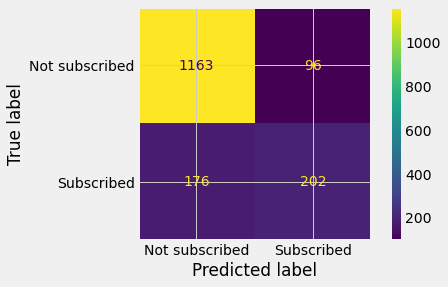

Accuracy obtained is  0.8338423946243128


In [154]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix = mat,display_labels=['Not subscribed','Subscribed'])
cm_display.plot()
plt.show()
accuracy=metrics.accuracy_score(y_test, y_pred)
print('Accuracy obtained is ',accuracy)

Model.append('BaggingClassifier')
tn, fp, fn, tp = mat.ravel()
TN.append(tn)
TP.append(tp)
FP.append(fp)
FN.append(fn)
TPR_lst.append(tp/(tp + fn))
TNR_lst.append(tn/(tn + fp))
accuracy_table.append(accuracy)

In [155]:
df=pd.DataFrame({'Model':Model,'TP':TP,'FP':FP,'TN':TN,'FN':FN,'accuracy':accuracy_table,'TPR':TPR_lst,'TNR':TNR_lst})
df.head(20)

,Model,TP,FP,TN,FN,accuracy,TPR,TNR
0,Knn,216,134,1125,162,0.819181,0.571429,0.893566
1,DecisionTree,194,86,1173,184,0.835064,0.513228,0.931692
2,RandomForestClassifier,192,84,1175,186,0.835064,0.507937,0.933280
3,GaussianNB,229,160,1099,149,0.811240,0.605820,0.872915
4,LogisticRegression,196,112,1147,182,0.820403,0.518519,0.911041
5,LinearSVC,194,126,1133,184,0.810629,0.513228,0.899921
6,VotingClassifier,174,93,1166,204,0.818571,0.460317,0.926132
7,BaggingClassifier,202,96,1163,176,0.833842,0.534392,0.923749


### Model outputs :

Among all the models , Decision tree classifier performs better with higher accuracy and good TPR and TNR numbers as well.


In [156]:
import pickle
pickle.dump(tree_clf, open('model.pkl','wb'))